In [2]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
manual_dataset = pd.read_csv("NewMLDataset_uncomplete.csv")

In [4]:
manual_dataset['begin_min'] = manual_dataset[['edge_begin', 'edge_end']].min(axis=1)
manual_dataset['end_max'] = manual_dataset[['edge_begin', 'edge_end']].max(axis=1)

In [5]:
root_dir = r'C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\NewMLDataset'

In [17]:
merged_df2['plate_id'].unique()

array(['20230901_Plate310', '20230902_Plate310', '20230903_Plate310',
       '20230904_Plate310', '20230905_Plate310', nan], dtype=object)

In [20]:
plate_ids = merged_df2['plate_id'].unique()

for plate_id in plate_ids:
    widths = []
    profiles = []
    select = merged_df2[merged_df2["plate_id"]==plate_id]
    for index,row in select.iterrows():
        id_video = row["id"]
        width = row['diameter']*0.138
        if row['mapping_quality']<3 and type(row['id'])!= float and width>0:
            for i in [10,15]:
                file = f"({row['end_max']}, {row['begin_min']})_{i}.npy"
                path = os.path.join(root_dir,id_video,file)
                if os.path.exists(path):
                    profile = np.load(path)
                    widths.append(width)
                    profiles.append(profile)  
    print(len(widths))
    np.save(f"{plate_id}_label",widths)
    np.save(f"{plate_id}_feature",profiles)
    # break

76
278
530
0
0
0


In [ ]:
np.save("antoine_dataset_label",widths)
np.save("antoine_dataset_feature",profiles)

In [ ]:
len(widths)

In [ ]:
fig,ax = plt.subplots()
i = 42
print(widths[i])
ax.plot(profiles[i])

In [ ]:
for 

In [7]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
plate_id = "310_20230830"
plate_id_video = "20230904_Plate310"
videos_folder = "/projects/0/einf914/videos/"
indexes = {
"20230901_Plate310" : 20,
"20230902_Plate310" : 33,
"20230903_Plate310" : 42,
"20230904_Plate310" : 52,
"20230905_Plate310" : 64,
# "20230906_Plate310" : 73,
}
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            edge_data_csv['unique_id'] = vid_obj.dataset['unique_id']
            
            all_infos = pd.concat([all_infos,edge_data_csv])

20230901_Plate310
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230901_Plate310\007\Img\edges_data.csv. Check analysis for 20230901_Plate310_007
20230902_Plate310
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230902_Plate310\004\Img\edges_data.csv. Check analysis for 20230902_Plate310_004
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230902_Plate310\005\Img\edges_data.csv. Check analysis for 20230902_Plate310_005
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230902_Plate310\006\Img\edges_data.csv. Check analysis for 20230902_Plate310_006
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230902_Plate310\011\Img\edges_data.csv. Check analysis for 20230902_Plate310_011

In [8]:
all_infos["edge_name"] = all_infos["edge_name"].apply(lambda x: eval(x))

# Extracting the first and second elements of the tuples into separate columns
all_infos["edge_begin"] = all_infos["edge_name"].apply(lambda x: x[0])
all_infos["edge_end"] = all_infos["edge_name"].apply(lambda x: x[1])

(array([ 19.,  77., 169., 175., 239., 141.,  26.,   3.,   2.,   1.]),
 array([ 2.10476662,  3.28412046,  4.46347431,  5.64282815,  6.822182  ,
         8.00153584,  9.18088968, 10.36024353, 11.53959737, 12.71895122,
        13.89830506]),
 <BarContainer object of 10 artists>)

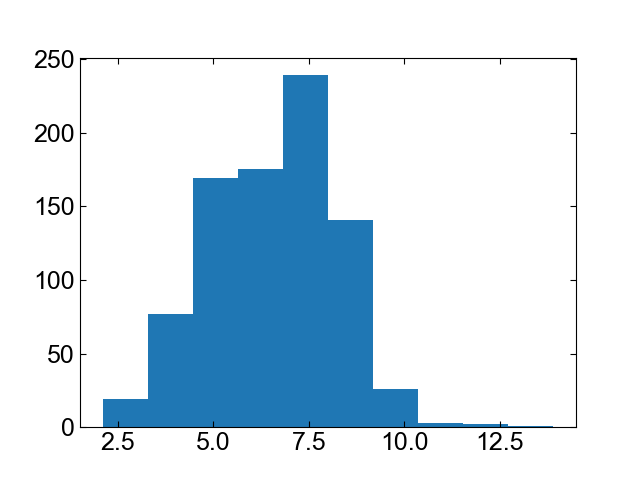

In [8]:
fig,ax = plt.subplots()
ax.hist(manual_dataset['diameter']*0.138)

In [9]:
for df in (all_infos, manual_dataset):
    df['begin_min'] = df[['edge_begin', 'edge_end']].min(axis=1)
    df['end_max'] = df[['edge_begin', 'edge_end']].max(axis=1)

# Merging on unique_id/id and the standardized columns
merged_df2 = pd.merge(all_infos, manual_dataset, left_on=['unique_id', 'begin_min', 'end_max'], right_on=['id', 'begin_min', 'end_max'],how="outer")
merged_df2['width_manual'] = merged_df2['diameter']*0.138

(array([789., 356., 113.,  95.,  83.,  90.,  84.,  56.,  78.,  92.,  80.,
         51.,  47.,  63.,  56.,  19.,   6.,   1.,  13.,  25.,   4.,   0.,
         17.,  25.,  17.,   5.,  14.,   0.,   0.,   0.,   0.,   0.,   8.,
          9.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([ 0.27321151,  1.84665104,  3.42009057,  4.9935301 ,  6.56696963,
         8.14040916,  9.71384869, 11.28728821, 12.86072774, 14.43416727,
        16.0076068 , 17.58104633, 19.15448586, 20.72792539, 22.30136492,
        23.87480445, 25.44824398, 27.0216835 , 28.59512303, 30.16856256,
        31.74200209, 33.31544162, 34.88888115, 36.46232068, 38.03576021,
        39.60919974, 41.18263927, 42.75607879, 44.32951832, 45.90295785,
        47.47639738, 49.04983691, 50.62327644, 52.19671597, 53.7701555 ,
        55.34359503, 56.91703456, 58.49047408, 60.06391361, 61.63735314,
        63.21079267]),
 <BarContainer object of 40 artists>)

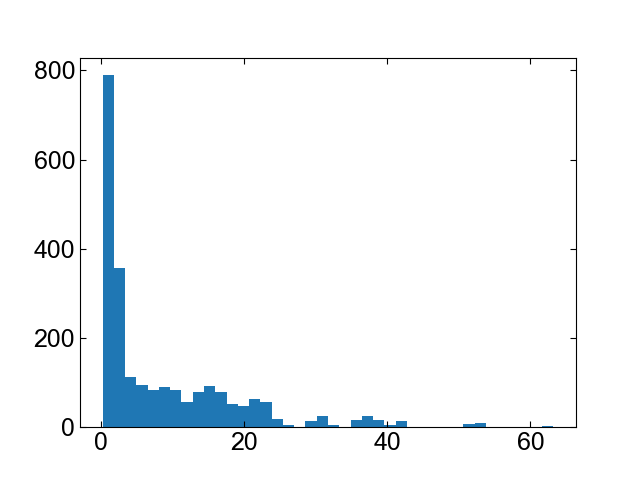

In [12]:
fig,ax = plt.subplots()
ax.hist(merged_df2['mapping_quality'],40)

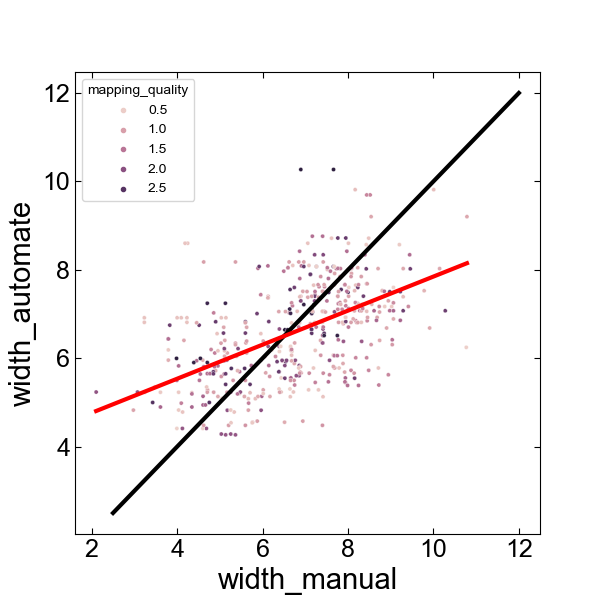

In [12]:
fig,ax = plt.subplots(figsize = (6,6))
select = merged_df2[merged_df2['mapping_quality']<=3]
select = select[select['width_manual']>0]
select = select[select['width_automate']>0]
sns.scatterplot(select,x="width_manual",y="width_automate",hue="mapping_quality")
ax.plot([2.5,12],[2.5,12],color="black")
# Extract x and y data
x = select["width_manual"]
y = select["width_automate"]

# Fit a linear regression model
coefficients = np.polyfit(x, y, deg=1)
x_fit = np.linspace(x.min(), x.max(), 100)

# Calculate the corresponding y values using the coefficients
y_fit = coefficients[0] * x_fit + coefficients[1]

# Plot the linear fit
ax.plot(x_fit, y_fit, color="red", label="Linear Fit")

(array([ 2.,  3.,  8., 12., 10., 19., 46., 42., 61., 56., 50., 54., 41.,
        22., 14., 11.,  6.,  2.,  2.,  1.]),
 array([0.40196816, 0.46805758, 0.53414701, 0.60023644, 0.66632587,
        0.7324153 , 0.79850472, 0.86459415, 0.93068358, 0.99677301,
        1.06286244, 1.12895186, 1.19504129, 1.26113072, 1.32722015,
        1.39330958, 1.459399  , 1.52548843, 1.59157786, 1.65766729,
        1.72375672]),
 <BarContainer object of 20 artists>)

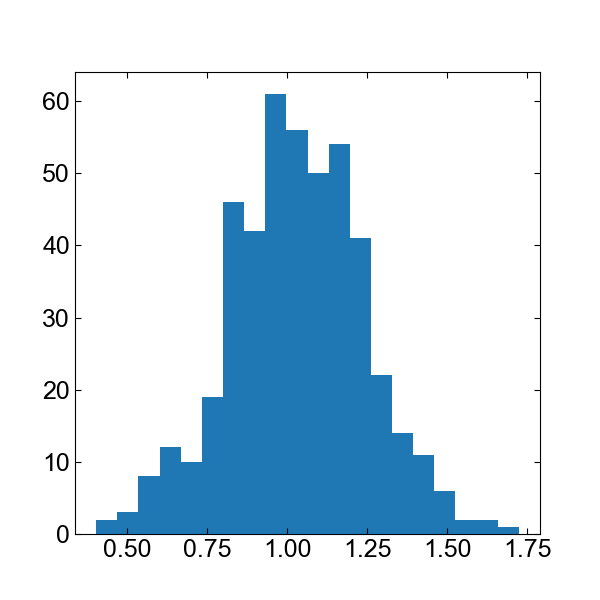

In [13]:
fig,ax = plt.subplots(figsize = (6,6))
ax.hist(select['width_manual']/select['width_automate'],20)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
select = merged_df2[merged_df2['mapping_quality']<=3]
select = select[select['width_manual']>0]
select = select[select['width_automate']>0]

y_test = select['width_manual']
y_pred_linear = select['width_automate']

linear_rmse = np.sqrt(mean_squared_error(y_test/2, y_pred_linear/2))
linear_r2 = r2_score(y_test/2, y_pred_linear/2)
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression R²: {linear_r2}")

Linear Regression RMSE: 0.6804546987500604
Linear Regression R²: 0.20890963709196064


<AxesSubplot: >

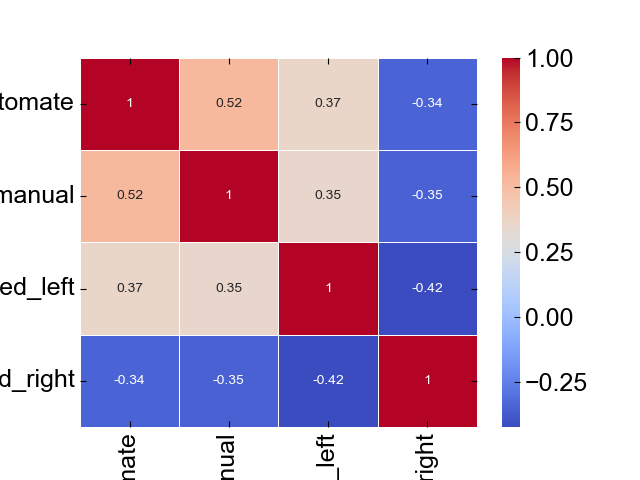

In [15]:
fig,ax = plt.subplots()
# select = merged_df2[merged_df2['mapping_quality']<=3]

selected_columns = select[['width_automate','width_manual','speed_left', 'speed_right']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

In [16]:
all_infos = merged_df2.copy()
all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

In [ ]:
infos_F

In [17]:
infos_F = all_infos.loc[all_infos['mode']=='F']
infos_F.drop(['edge_length','straight_length',"network_end","network_begin","mapping_quality","width_automate","betweenness_automate","load","mode"],axis = 1)
infos_BF = all_infos.loc[all_infos['mode']=='BF']
infos_BF = infos_BF.drop(['mode'], axis=1)
merged_df = infos_F.merge(infos_BF,on = ["xpos","ypos","plate_id","network_end","network_begin"],suffixes=("F","BF"))
merged_df['speed_lipid'] = np.where(merged_df['coverage_leftF'] > merged_df['coverage_rightF'], merged_df['speed_leftBF'], merged_df['speed_rightBF'])
merged_df['speed_other'] = np.where(merged_df['coverage_leftF'] > merged_df['coverage_rightF'], merged_df['speed_rightBF'], merged_df['speed_leftBF'])
merged_df['speed_lipid2'] = np.where(merged_df['flux_avgF'] < 0, merged_df['speed_leftBF'], merged_df['speed_rightBF'])
merged_df['speed_other2'] = np.where(merged_df['flux_avgF'] < 0, merged_df['speed_rightBF'], merged_df['speed_leftBF'])
merged_df['abs_speed_lipid2'] = np.abs(merged_df['speed_lipid2'])
merged_df['abs_speed_other2'] = np.abs(merged_df['speed_other2'])


In [18]:
select = merged_df[merged_df['width_manualBF']>0]
select[select['coverage_totBF']>0.05]

,Unnamed: 0F,Unnamed: 0.1F,edge_nameF,edge_lengthF,straight_lengthF,speed_maxF,speed_minF,speed_meanF,flux_avgF,flux_minF,...,speed_subBF,speed_sub_absBF,speed_main_absBF,coverage_mainBF,speed_lipid,speed_other,speed_lipid2,speed_other2,abs_speed_lipid2,abs_speed_other2
0,0.0,0.0,"(4, 0)",49.956,53.333920,5.171268,-5.811432,0.056976,-1.437737,-61.795276,...,-2.688219,2.688219,3.139173,0.622394,3.139173,-2.688219,-2.688219,3.139173,2.688219,3.139173
1,0.0,0.0,"(4, 0)",49.956,53.333920,5.171268,-5.811432,0.056976,-1.437737,-61.795276,...,-2.688219,2.688219,3.139173,0.622394,3.139173,-2.688219,-2.688219,3.139173,2.688219,3.139173
2,0.0,0.0,"(4, 0)",49.956,53.333920,5.171268,-5.811432,0.056976,-1.437737,-61.795276,...,-1.640200,1.640200,2.900825,0.290971,2.900825,-1.640200,-1.640200,2.900825,1.640200,2.900825
3,0.0,0.0,"(4, 0)",49.956,53.333920,5.171268,-5.811432,0.056976,-1.437737,-61.795276,...,-1.640200,1.640200,2.900825,0.290971,2.900825,-1.640200,-1.640200,2.900825,1.640200,2.900825
4,0.0,0.0,"(4, 0)",49.956,53.333920,5.171268,-5.811432,0.056976,-1.437737,-61.795276,...,-4.629350,4.629350,3.645530,0.403294,3.645530,-4.629350,-4.629350,3.645530,4.629350,3.645530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.0,0.0,"(8, 1)",42.918,55.569466,8.128076,-2.278744,0.486995,14.488557,-20.964647,...,-2.994895,2.994895,2.221824,0.369936,2.221824,-2.994895,2.221824,-2.994895,2.221824,2.994895
672,0.0,0.0,"(3, 0)",94.806,106.573622,5.367376,-3.662574,0.355484,2.151075,-3.424788,...,-5.020429,5.020429,3.169437,0.173657,3.169437,-5.020429,3.169437,-5.020429,3.169437,5.020429
673,0.0,0.0,"(3, 0)",94.806,106.573622,5.367376,-3.662574,0.355484,2.151075,-3.424788,...,-5.020429,5.020429,3.169437,0.173657,3.169437,-5.020429,3.169437,-5.020429,3.169437,5.020429
674,0.0,0.0,"(3, 0)",94.806,106.573622,5.367376,-3.662574,0.355484,2.151075,-3.424788,...,-4.585369,4.585369,3.132493,0.146192,3.132493,-4.585369,3.132493,-4.585369,3.132493,4.585369


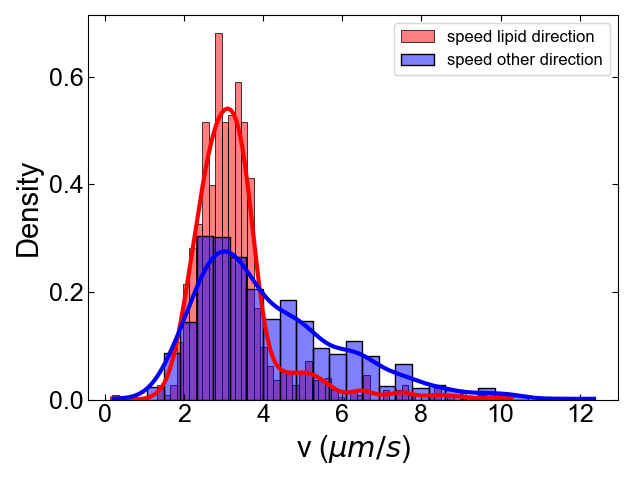

In [19]:
select = merged_df
fig,ax = plt.subplots()
select = select[select['coverage_totBF']>0.05]

sns.histplot(np.abs(select['speed_lipid']),color='red',stat="density",kde=True,label = "speed lipid direction")
sns.histplot(np.abs(select['speed_other']),color='blue',stat="density",kde=True,label = "speed other direction")
ax.legend(fontsize='large')
ax.set_xlabel("v ($\mu m/s$)")
plt.tight_layout()

In [ ]:
select['width_manualF']

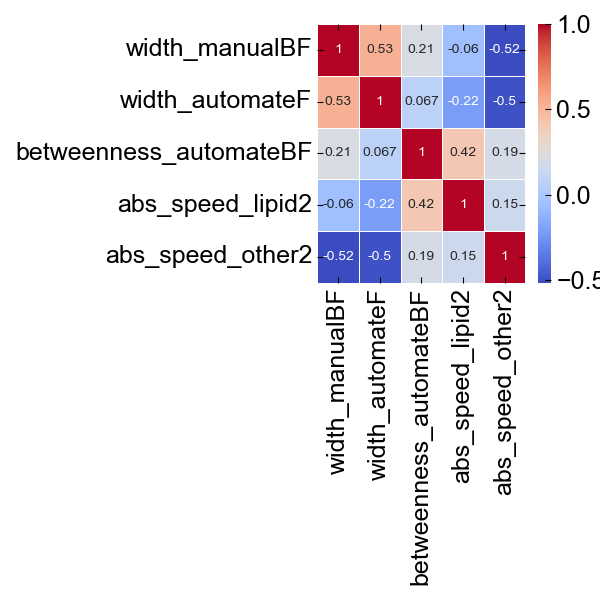

In [22]:
fig,ax = plt.subplots(figsize = (6,6))
all_infos_sub = merged_df[merged_df['plate_id']=='20230902_Plate310']
select = all_infos_sub
select = select[select['mapping_qualityBF']<=3]

select = select[select['coverage_totBF']>0.05]
# select = select[select['width_manualF']>0]

select = select[select['speed_rightBF']<=15]
select = select[select['speed_lipid2']<=15]

selected_columns = select[['width_manualBF','width_automateF',"betweenness_automateBF",'abs_speed_lipid2','abs_speed_other2']]

# Calculating Pearson correlation matrix
correlation_matrix = selected_columns.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.tight_layout()

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming merged_df is your initial DataFrame

# Step 1: Parse the Date from plate_id and add it as a new column
merged_df['date'] = pd.to_datetime(merged_df['plate_id'].str.split('_').str[0], format='%Y%m%d')

# Number of bootstrap samples
n_bootstraps = 100

# Initialize a dictionary to store correlation dataframes for each pair
correlations_dict = {}
uncertainty_dict = {}
dates = []
for date, group in merged_df.groupby('date'):
    dates.append(date)
    select = group[(group['coverage_totBF'] > 0.05) & 
                   (group['speed_rightBF'] <= 15) & 
                   (group['mapping_qualityBF'] <= 3) & 
                   
                   (group['speed_lipid2'] <= 15)]
    
    selected_columns = select[["width_manualBF",'width_automateF', "betweenness_automateBF", 'abs_speed_lipid2', 'abs_speed_other2',"speed_rightBF","speed_leftBF"]]
    correlation_matrix = selected_columns.corr()

    # Iterate through the correlation matrix to update our dictionaries
    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            if row >= col:  # Avoid duplicating pairs and self-correlations
                continue
            key = f"{row} vs {col}"
            
            # Perform bootstrap resampling for the pair
            bootstrapped_corrs = []
            for _ in range(n_bootstraps):
                bootstrap_sample = selected_columns[[row, col]].sample(n=select.shape[0], replace=True)
                corr = bootstrap_sample.corr().iloc[0, 1]
                bootstrapped_corrs.append(corr)
            
            # Calculate mean and 95% confidence interval
            mean_corr = np.mean(bootstrapped_corrs)
            lower_bound = np.percentile(bootstrapped_corrs, 2.5)
            upper_bound = np.percentile(bootstrapped_corrs, 97.5)
            
            # Update correlations_dict
            if key not in correlations_dict:
                correlations_dict[key] = pd.DataFrame(columns=['date', 'correlation'])
            temp_df = pd.DataFrame({'date': [date], 'correlation': [mean_corr]})
            correlations_dict[key] = pd.concat([correlations_dict[key], temp_df], ignore_index=True)
            
            # Update uncertainty_dict
            if key not in uncertainty_dict:
                uncertainty_dict[key] = pd.DataFrame(columns=['date', 'lower', 'upper'])
            temp_uncertainty_df = pd.DataFrame({'date': [date], 'lower': [lower_bound], 'upper': [upper_bound]})
            uncertainty_dict[key] = pd.concat([uncertainty_dict[key], temp_uncertainty_df], ignore_index=True)


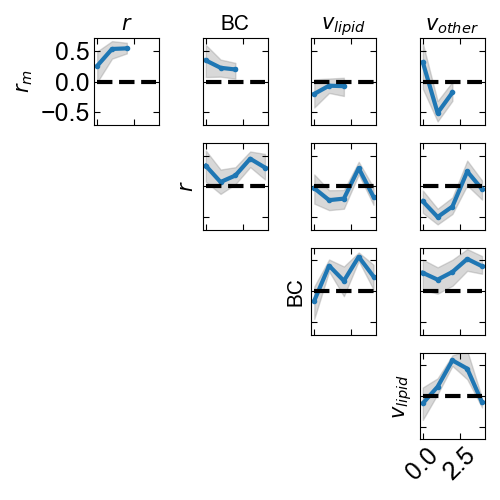

In [31]:
import matplotlib.pyplot as plt

# Assuming we have 4 variables, leading to a 3x3 grid of correlations (excluding self-correlations)
variables = ["width_manualBF",'width_automateF', 'betweenness_automateBF', 'abs_speed_lipid2', 'abs_speed_other2']
variable_names = ["$r_m$",'$r$', 'BC', '$v_{lipid}$', '$v_{other}$']
# First, calculate the minimum date to use as a baseline

# Convert the date differences from the minimum date into days
# This involves first converting the timedelta results into 'timedelta64[D]' to get days,
# and then converting to integers.


n = len(variables)

# Create a figure and axes in a grid
fig, axs = plt.subplots(n-1, n-1, figsize=(5, 5), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Function to find the corresponding dataframe for a given pair
def find_df_for_pair(row_var, col_var):
    for key in correlations_dict:
        if row_var in key and col_var in key:
            return correlations_dict[key].sort_values('date'), uncertainty_dict[key].sort_values('date')
    return None, None

# Plotting in a matrix layout
for i in range(n-1):
    for j in range(i+1, n):
        row_var = variables[i]
        col_var = variables[j]
        correlation_df, uncertainty_df = find_df_for_pair(row_var, col_var)
        min_date = np.min(correlation_df['date'])
        correlation_df['days_since_min'] = (correlation_df['date'] - min_date).dt.days
        uncertainty_df['days_since_min'] = (uncertainty_df['date'] - min_date).dt.days
        if correlation_df is not None and uncertainty_df is not None:
            axs[i, j-1].plot(correlation_df['days_since_min'], correlation_df['correlation'], marker='o', label=f'{row_var} vs {col_var}')
            axs[i, j-1].fill_between(uncertainty_df['days_since_min'], uncertainty_df['lower'], uncertainty_df['upper'], color='gray', alpha=0.3)
            # axs[i, j-1].set_title(f'{row_var} vs {col_var}')
            # axs[i, j-1].grid(True)
            # axs[i, j-1].legend()

# Adjusting labels for clarity
for ax, col_var in zip(axs[0], variable_names[1:]):
    ax.set_title(col_var,fontdict = {"fontsize" : 15})
for ax, row_var,date in zip(axs[:,0], variable_names[:-1],dates):
    ax.set_ylim(-0.7,0.7)

for j in range(n-1):
    # Assuming we're sharing x-axis, we only need to adjust the last row
    axs[n-2, j].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels to 45 degrees

for i in range(n-1):
    for j in range(n-1):
        # Now explicitly skipping lower triangle plots by hiding those axes
        if i > j:
            axs[i, j].axis('off')  # This hides the axes in the lower triangle and the diagonal
        else:
            axs[i, j].hlines(0,0,4,color="black",linestyle="dashed")
        if i==j:
            axs[i, j].set_ylabel(variable_names[:-1][i], rotation=90, size=15)
            
            
  

plt.tight_layout()
plt.show()
